In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Allows to see up to 500 columns within notebook
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)



In [2]:
pickle_in = open("df_pickle.pkl","rb")
df = pickle.load(pickle_in)
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT_app_train,AMT_ANNUITY_app_train,AMT_GOODS_PRICE_app_train,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_APPLICATION,AMT_DOWN_PAYMENT,CHANNEL_TYPE,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,SELLERPLACE_AREA,AMT_ANNUITY,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_PAYMENT,DAYS_INSTALMENT,NUM_INSTALMENT_NUMBER,AMT_INSTAL_PAY_DIFF,NUM_INSTAL_VERSION_NUM_DIFF,DAY_INSTAL_ENTRY_DIFF,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,202500.0,406597.5,24700.5,351000.0,-9461,-637,-3648.0,-2120,365423.0,0.083037,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,-1134.0,0.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.000,365423.000,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,1
100003,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,-1186.0,-291,365423.0,0.311267,365423.000000,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,0.0,-828.0,0.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,98356.995,98356.995,-690.0,-686.0,2.0,0.0,-1.0,4.0,0
100004,67500.0,135000.0,6750.0,135000.0,-19046,-225,-4260.0,-2531,26.0,365423.000000,0.729567,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.00,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.000,365423.0000,365423.0,365423.0,365423.0000,365423.0000,365423.0000,365423.0000,365423.00,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.00,365423.0000,0.0,0.0,0.0,-815.0,0.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.000,365423.000,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,0
100006,135000.0,312682.5,29686.5,297000.0,-19005,-3039,-9833.0,-2437,365423.0,365423.000000,365423.000000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.00,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000

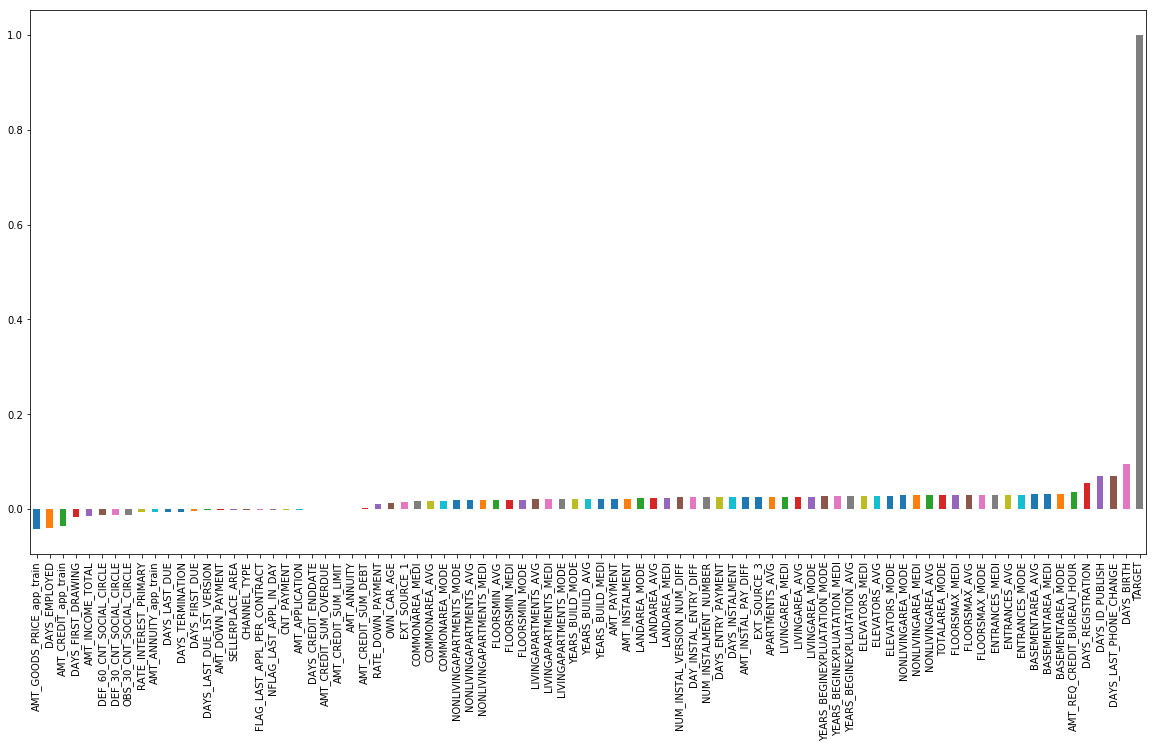

In [4]:
#Correlation bar chart of all of my features
correlations = df.corr()['TARGET'].sort_values()
plt.figure(figsize=(20,10))
correlations.plot(kind='bar')


# Number of Loan Paid vs Unpaid

On the graph below, the number of applicants who paid back their loan (shown as '0') greatly outweighed the applicants who feel behind (shown as '1'). Industry average for 30+ deliquency rate is 4.3%. This applicant pool is about 7.9%. So there is room for improvement. 

Source: http://www.worldpropertyjournal.com/real-estate-news/united-states/irvine/corelogic-loan-performance-insights-report-june-2018-frank-martell-mortgage-loan-delinquency-rates-serious-delinquent-mortgage-loans-in-2018-real-estate-news-10920.php


0    8801
1     751
Name: TARGET, dtype: int64

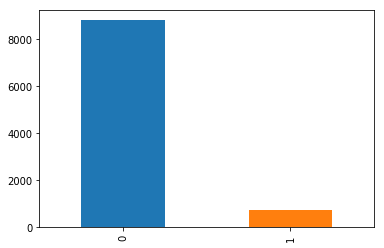

In [5]:
df.TARGET.value_counts().plot(kind='bar')
df.TARGET.value_counts()

# Comparing Incomes by Target Criteria

Lower income tends to typically have more difficulties with loan repayment. If possible, we could look further into the loan approval process. Overall, this helps narrow down the group of loan deliquencies.

count      8801.000000
mean     154379.427689
std       65431.919784
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      202500.000000
max      348750.000000
Name: AMT_INCOME_TOTAL, dtype: float64
count       751.000000
mean     150787.174434
std       59487.126159
min       36000.000000
25%      112500.000000
50%      135000.000000
75%      180000.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64


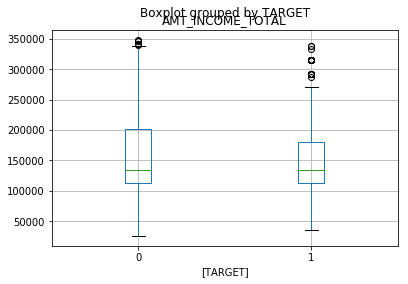

In [6]:

df[['AMT_INCOME_TOTAL','TARGET']].boxplot(by='TARGET')
print(df['AMT_INCOME_TOTAL'][df.TARGET == 0].describe())
print(df['AMT_INCOME_TOTAL'][df.TARGET == 1].describe())

# Scatter Plot between Income and Credit Recieved

While there is a correlation between income and credit, I am quite surprised on how low it is. There could be some situation where tightening of the credit limit could be applied. 

In addition, the orange dots show the loans that were not paid. It seems like this group were given lower loans from the start. Could there have been signs during the applications process that caused them to recieve lower loans? 

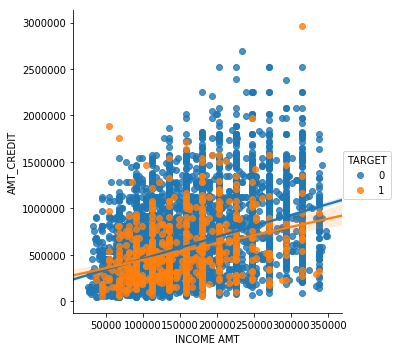

,AMT_INCOME_TOTAL,AMT_CREDIT_app_train
AMT_INCOME_TOTAL,1.000000,0.392498
AMT_CREDIT_app_train,0.392498,1.000000


In [7]:
sns.lmplot('AMT_INCOME_TOTAL','AMT_CREDIT_app_train',df,hue='TARGET')
plt.xlabel('INCOME AMT')
plt.ylabel('AMT_CREDIT')
plt.show()
df[['AMT_INCOME_TOTAL','AMT_CREDIT_app_train']].corr()

# Analysing the spread of Income

The typical US income Q3-Q1 range is about $60K. Home Credit's applicant pool has an income range of $80K. In addition, the typical Q3 for USA incomes are about $90K, while this pool is about $200K. We have a different size of applicants than the typical population of the United States, so majority of the applicants have the means to repay a mortgage. 

count      9552.000000
mean     154096.996555
std       64988.522724
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      202500.000000
max      348750.000000
Name: AMT_INCOME_TOTAL, dtype: float64


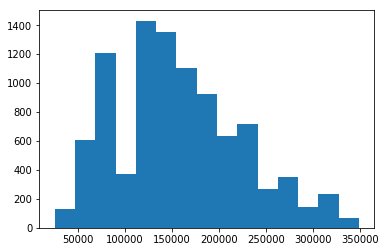

In [8]:
plt.hist(df['AMT_INCOME_TOTAL'],bins=15)
print(df.AMT_INCOME_TOTAL.describe())


# Average Price of Good Purchased with Loan

On average, the target groups both purchased the same priced goods. However, there are differences. 

1. Mean is about 50K lower for '1' group. 
2. Standard Deviation is also 50K lower for group '1'. 

This further shows that this group typically are clustered closer together than group '0'. Potentially, I can use clustering techiniques in the next step to further analyze any possible clusters. 

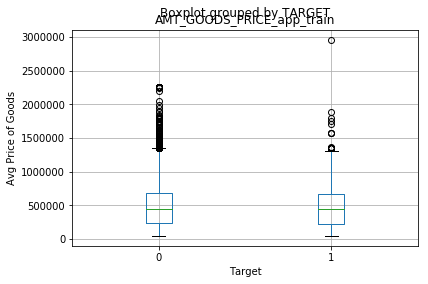

count    8.801000e+03
mean     5.261786e+05
std      3.554577e+05
min      4.500000e+04
25%      2.340000e+05
50%      4.500000e+05
75%      6.795000e+05
max      2.254500e+06
Name: AMT_GOODS_PRICE_app_train, dtype: float64
count    7.510000e+02
mean     4.701524e+05
std      3.072491e+05
min      4.500000e+04
25%      2.250000e+05
50%      4.500000e+05
75%      6.705000e+05
max      2.961000e+06
Name: AMT_GOODS_PRICE_app_train, dtype: float64


In [9]:
df[['AMT_GOODS_PRICE_app_train','TARGET']].boxplot(by='TARGET')
plt.xlabel('Target')
plt.ylabel('Avg Price of Goods')
plt.show()
print(df['AMT_GOODS_PRICE_app_train'][df.TARGET == 0].describe())
print(df['AMT_GOODS_PRICE_app_train'][df.TARGET == 1].describe())

# Histogram of Good Purchased

There seems to be several groups of bins that typically are purchased more often than others. And Group '1' is fairly similar to full dataframe's distribution. 

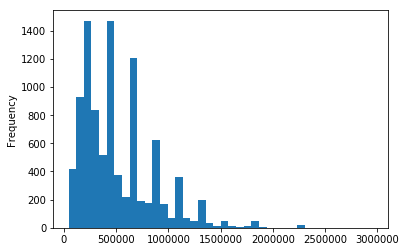

In [10]:
df['AMT_GOODS_PRICE_app_train'].plot(kind='hist',bins=40)

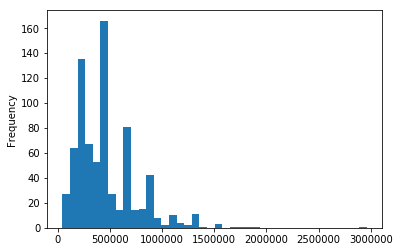

In [11]:
df['AMT_GOODS_PRICE_app_train'][df.TARGET==1].plot(kind='hist',bins=40)

# Correlation Plot between income and Good Price

I wanted to see if income had any correlation with the good purchased. There is a higher correlation between Good Price and Income for applicants that have not had trouble with their loan. 

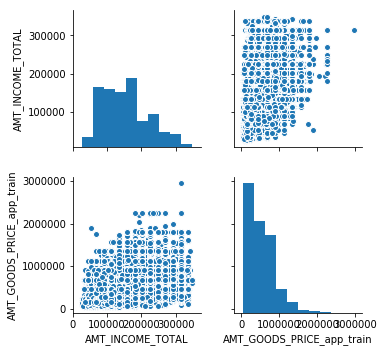

                           AMT_INCOME_TOTAL  AMT_GOODS_PRICE_app_train
AMT_INCOME_TOTAL                   1.000000                   0.317265
AMT_GOODS_PRICE_app_train          0.317265                   1.000000
                           AMT_INCOME_TOTAL  AMT_GOODS_PRICE_app_train
AMT_INCOME_TOTAL                   1.000000                   0.399649
AMT_GOODS_PRICE_app_train          0.399649                   1.000000


In [12]:
sns.pairplot(df[['AMT_INCOME_TOTAL','AMT_GOODS_PRICE_app_train']])
plt.show()
print(df[['AMT_INCOME_TOTAL','AMT_GOODS_PRICE_app_train']][df.TARGET == 1].corr())
print(df[['AMT_INCOME_TOTAL','AMT_GOODS_PRICE_app_train']][df.TARGET == 0].corr())

# Boxplots based on Age and Target

Based on this box plot, younger applicants are more likely to have difficulties with their loan.

Text(0.5,1,'Age by TARGET')

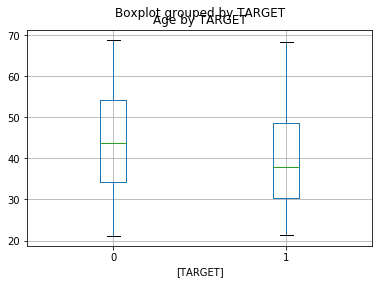

In [13]:

df.DAYS_BIRTH = df.DAYS_BIRTH.apply(lambda x:x/-365)
df[['DAYS_BIRTH','TARGET']].boxplot(by='TARGET')
plt.title('Age by TARGET')

# Scatter Plot between Credit and Good Price Purchased

The bank provide consistent credit for the good that was being purchased. We can assume that the applicants used mainly credit to purchase the good. I wonder if any of the outliers on this graph had trouble with paying the loan.  

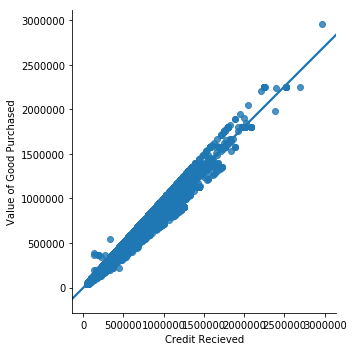

,AMT_CREDIT_app_train,AMT_GOODS_PRICE_app_train
AMT_CREDIT_app_train,1.000000,0.986077
AMT_GOODS_PRICE_app_train,0.986077,1.000000


In [14]:
sns.lmplot('AMT_CREDIT_app_train','AMT_GOODS_PRICE_app_train',df)
plt.xlabel('Credit Recieved')
plt.ylabel('Value of Good Purchased')
plt.show()
df[['AMT_CREDIT_app_train','AMT_GOODS_PRICE_app_train']].corr()

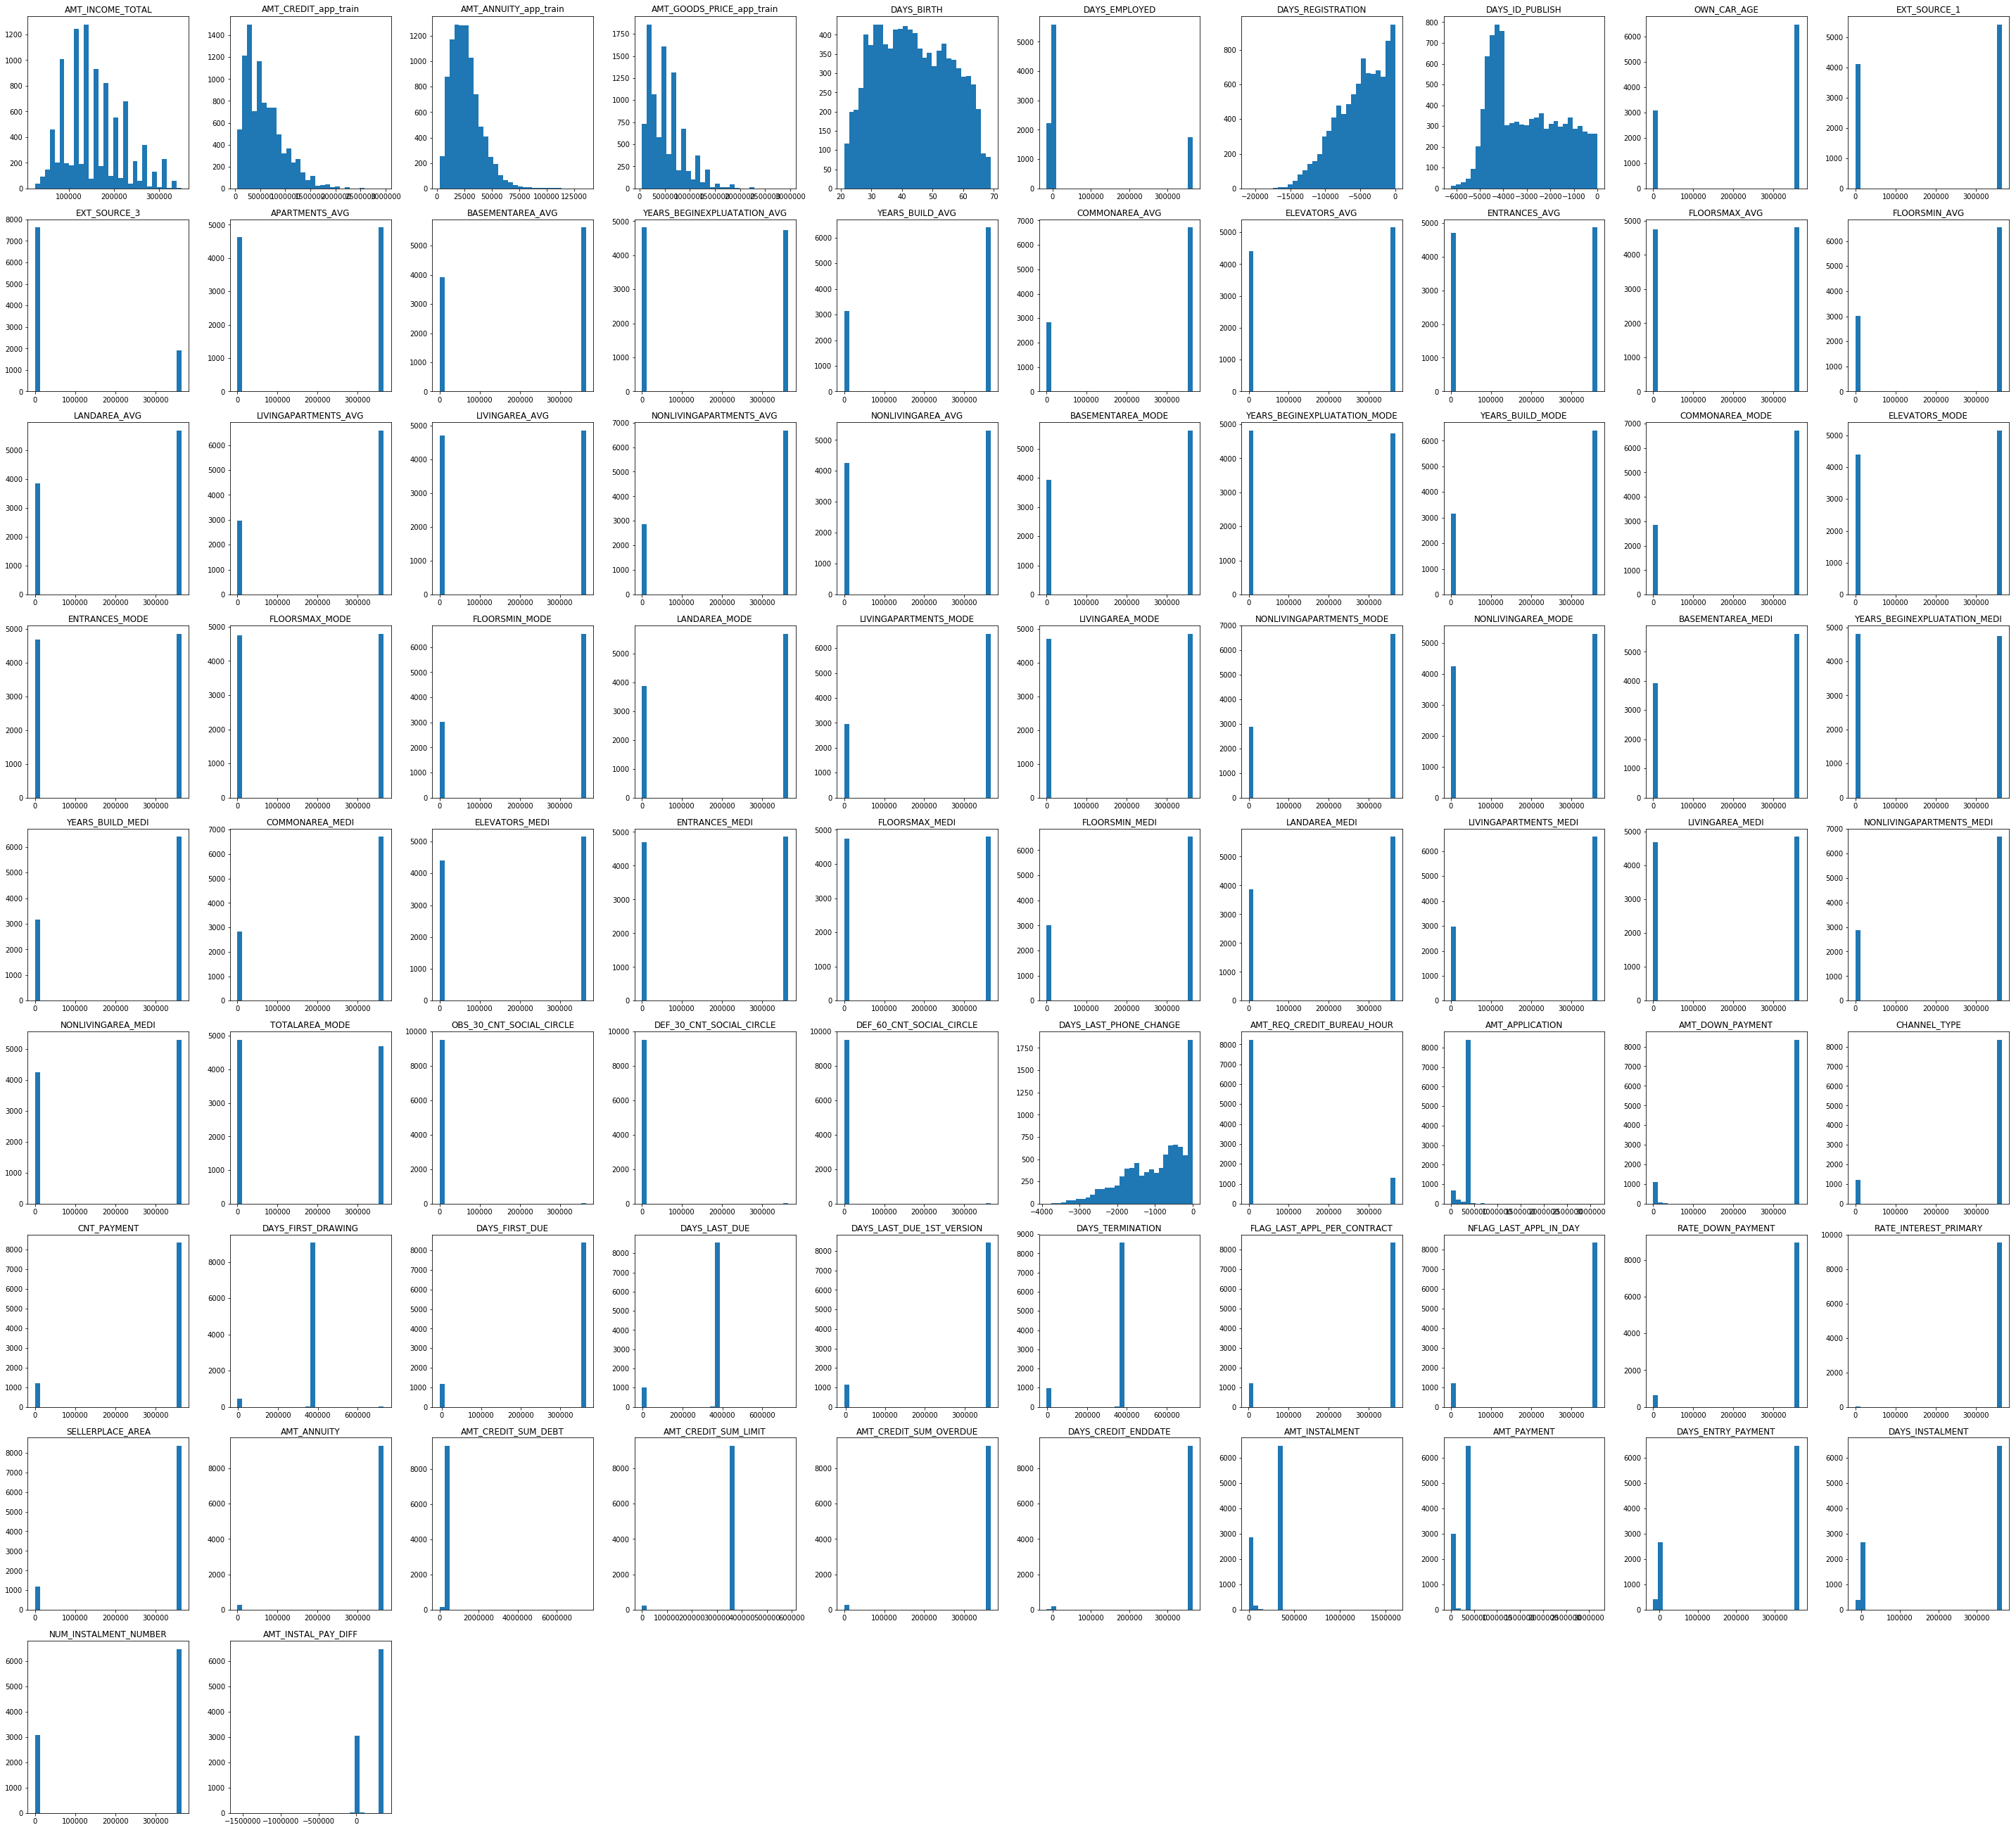

In [54]:
# Create a figure with 1x2 subplot and make the left subplot active

plt.subplots(figsize=(40, 40))
for x in range(1,83):
    plt.subplot(10,10,x)
    plt.hist(df.iloc[:,x-1],bins=30)
   
    plt.title(df.columns[x-1])


# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()

plt.show()